# **Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Uploading the data and loading it into a dataframe

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [ ]:
df=pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## Checking the types of data and its statistics

*A concise summary of the dataframe*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


*Checking the types of data for each column*

In [ ]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

*Shape of dataframe*

In [ ]:
df.shape

(5000, 14)

*Checking presence of null values*

In [ ]:
df.isnull().values.sum()

0

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


*Calculating statistical data*

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


*Dropping irrelevant columns*

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df.get("Age")

0       25
1       45
2       39
3       35
4       35
        ..
4995    29
4996    30
4997    63
4998    65
4999    28
Name: Age, Length: 5000, dtype: int64

In [ ]:
df.get("Experience")

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [ ]:
experience=df["Experience"]
age=df["Age"]

age.corr(experience)

0.9942148569683321

In [ ]:
df=df.drop(columns=["ID","Experience","ZIP Code"])
df.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


*Checking the number of unique values in each column*

In [ ]:
unique=df.nunique(axis=0)
unique

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

*Checking the number of people with 0 mortgage*

In [ ]:
zero_mortgage=df.Mortgage[df.Mortgage==0].count()
print(f"People with zero mortgage {zero_mortgage}")

People with zero mortgage 3462


*Checking number of people with 0 CC Expenditure*

In [ ]:
zero_CreditCard=df.CreditCard[df.CreditCard==0].count()
print(f"People with zero CC Expense {zero_CreditCard}")

People with zero CC Expense 3530


*Value counts of all binary value columns*

In [ ]:
for i in df.columns:
  if(df[i].nunique()==2):
    print(i)
    print(df[i].value_counts())
    print()

Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64

Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64

CD Account
0    4698
1     302
Name: CD Account, dtype: int64

Online
1    2984
0    2016
Name: Online, dtype: int64

CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64



*Checking the corrrelation between each of the left features*

In [ ]:
df.corr()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210


*Plotting a correlation heat map*

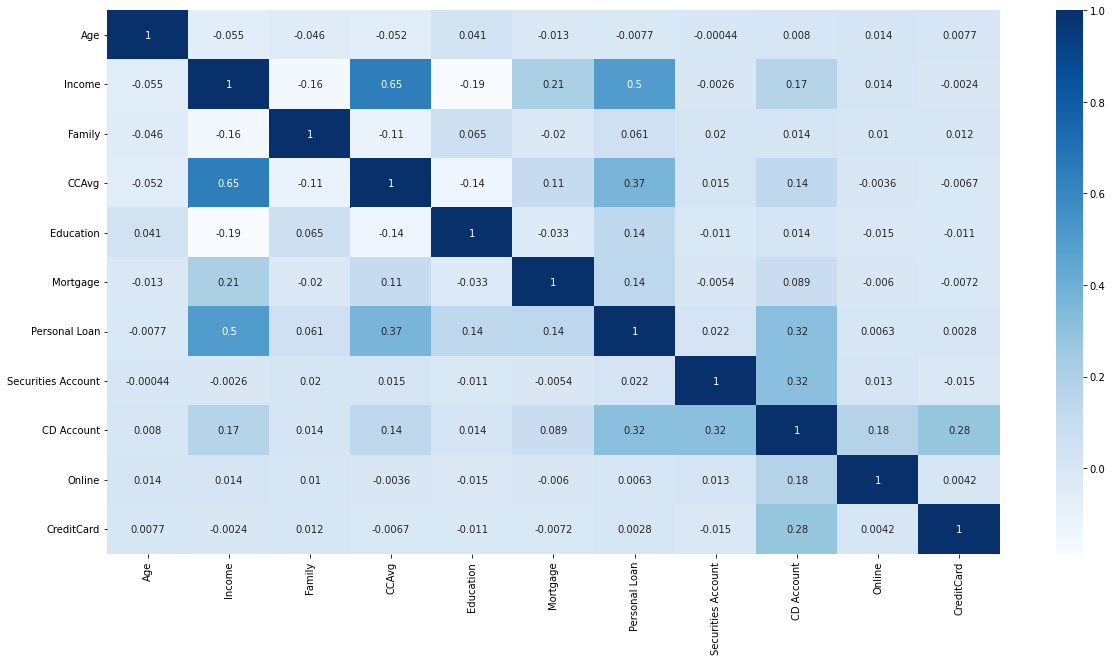

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap="Blues",annot=True)

In [ ]:
df.head(50)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


#Converting the dataframe to a numpy array to apply necessary transformations

In [ ]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [ ]:
X=df[['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard']].values
y=df["Personal Loan"].values
print(X)
print(y)

[[25. 49.  4. ...  0.  0.  0.]
 [45. 34.  3. ...  0.  0.  0.]
 [39. 11.  1. ...  0.  0.  0.]
 ...
 [63. 24.  2. ...  0.  0.  0.]
 [65. 49.  3. ...  0.  1.  0.]
 [28. 83.  3. ...  0.  1.  1.]]
[0 0 0 ... 0 0 0]


**Checking the shape of arrays X and y**

In [ ]:
X.shape

(5000, 10)

In [ ]:
y.shape

(5000,)

**Computing statistical values of numpy arrays**

In [ ]:
# minimum of the matrix X (accross all the elements)
print("Minimum across elements:",np.min(X))

# minimum across rows and columns 
print("Row-wise Minimum:",np.min(X,axis=0)) 
print("Column-wise Minimum:",np.min(X,axis=1))

# mean average of all the elements
print("Mean:",np.mean(X,axis=1))

# median
print("Median:",np.median(X,axis=1)) 

# standard deviation
print("Standard Deviation:",np.std(X))

#for variance
print("Variance:",np.var(X)) 

Minimum across elements: 0.0
Row-wise Minimum: [23.  8.  1.  0.  1.  0.  0.  0.  0.  0.]
Column-wise Minimum: [0. 0. 0. ... 0. 0. 0.]
Mean: [ 8.16  8.55  5.3  ...  9.23 12.05 11.78]
Median: [1.   1.   0.5  ... 0.15 0.75 1.  ]
Standard Deviation: 44.67502339059866
Variance: 1995.8577149505375


**Feature scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-1.77441684, -0.53822878,  1.39741398, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.8641094 ,  0.52599094, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -1.36379301, -1.21685513, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033, -1.08136314, -0.34543209, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965, -0.53822878,  0.52599094, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285,  0.20043396,  0.52599094, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [ ]:
# minimum of the matrix X (accross all the elements)
print("Minimum across elements:",np.min(X))

# minimum across rows and columns 
print("Row-wise Minimum:",np.min(X,axis=0)) 
print("Column-wise Minimum:",np.min(X,axis=1))

# mean average of all the elements
print("Mean:",np.mean(X,axis=1))

# median
print("Median:",np.median(X,axis=1)) 

# standard deviation
print("Standard Deviation:",np.std(X))

#for variance
print("Variance:",np.var(X)) 

Minimum across elements: -1.9489061656412838
Row-wise Minimum: [-1.94890617 -1.42896914 -1.21685513 -1.10898742 -1.04907792 -0.55552393
 -0.34142334 -0.25354028 -1.21661774 -0.64531434]
Column-wise Minimum: [-1.77441684 -1.21661774 -1.36379301 ... -1.21661774 -0.8228618
 -1.51268285]
Mean: [-0.18997761 -0.14094116 -0.77318734 ... -0.25031628  0.00481219
 -0.12654266]
Median: [-0.54687635 -0.4045321  -0.60041913 ... -0.45047801 -0.29748181
 -0.29748181]
Standard Deviation: 1.0
Variance: 1.0


*Normalization*

In [ ]:
from sklearn.preprocessing import normalize

X=normalize(X)
X

array([[-0.42566535, -0.12911585,  0.33522602, ..., -0.06082185,
        -0.29185477, -0.15480463],
       [-0.00817718, -0.2393332 ,  0.14568421, ..., -0.07022329,
        -0.33696777, -0.17873332],
       [-0.20299364, -0.50062482, -0.44668646, ..., -0.09307025,
        -0.44659932, -0.23688373],
       ...,
       [ 0.52231439, -0.3665512 , -0.11709161, ..., -0.08594291,
        -0.41239864, -0.21874312],
       [ 0.71303576, -0.22372808,  0.21864113, ..., -0.10539028,
         0.34166418, -0.26824084],
       [-0.54527184,  0.07224977,  0.18960223, ..., -0.09139283,
         0.29628594,  0.55859092]])

In [ ]:
# minimum of the matrix X (accross all the elements)
print("Minimum across elements:",np.min(X))

# minimum across rows and columns 
print("Row-wise Minimum:",np.min(X,axis=0)) 
print("Column-wise Minimum:",np.min(X,axis=1))

# mean average of all the elements
print("Mean:",np.mean(X,axis=1))

# median
print("Median:",np.median(X,axis=1)) 

# standard deviation
print("Standard Deviation:",np.std(X))

#for variance
print("Variance:",np.var(X)) 

Minimum across elements: -0.773122184791036
Row-wise Minimum: [-0.77312218 -0.69107301 -0.66950531 -0.51812849 -0.62000469 -0.4163265
 -0.2817221  -0.20920626 -0.74081723 -0.53247476]
Column-wise Minimum: [-0.42566535 -0.33696777 -0.50062482 ... -0.41239864 -0.34204283
 -0.54527184]
Mean: [-0.04557378 -0.03903661 -0.2838237  ... -0.08485006  0.00200031
 -0.04561442]
Median: [-0.13119032 -0.11204364 -0.22040348 ... -0.15269917 -0.12365566
 -0.10723229]
Standard Deviation: 0.31560238649464484
Variance: 0.09960486636111517


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.9)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(500, 10) (4500, 10) (500,) (4500,)


**Using Logistic Regression for prediction**

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

*Predictions*

In [ ]:
y_predict=model.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 0]


*Model evaluation*

In [ ]:
from sklearn import metrics

print("Mean absolute error:", metrics.mean_absolute_error(y_test,y_predict))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_absolute_error(y_test,y_predict)))

Mean absolute error: 0.052222222222222225
Root Mean Squared Error: 0.22852182001336815
